Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('heart_disease.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [4]:
data.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [5]:
data.shape

(999, 13)

In [6]:
data.duplicated().sum()

np.int64(91)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.shape

(908, 13)

In [10]:
data.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


In [11]:
data.isnull().sum()

,0
age,1
sex,1
cp,1
trestbps,1
chol,1
fbs,1
restecg,1
thalch,1
exang,1
oldpeak,63


In [12]:
for col in data:
  print(col)
  print(data[col].unique())

age
[63. 41. 57. 52. 66. 56. 48. 53. 30. 54. 37. 46. 68. 76. 58. 42. 64. 71.
 69. 45. 44. 39. 62. 50. 55. 49. 43. 51. 36. 59. 61. 60. 67. 70. 47. 65.
 38. 34. 35. 29. 74. 75. 40. 72. 31. 73. 33. 32. 77. nan]
sex
['Male' 'Female' nan]
cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal' nan]
trestbps
[145. 135. 140. 118. 110. 160. 130. 155. 170. 150. 125. 120. 142. 100.
 102. 112. 146. 138. 134. 122. 136. 108. 115. 104. 128. 106. 156. 129.
 124. 126. 132. 105. 152. 148.  94. 180. 178. 101. 172.  80. 114. 190.
 113. 154. 175. 133. 131. 181. 188. 193. 153. 179. 143.  90.  96. 163.
 161. 196. 107. 167. 174. 158. 192. 185. 144. 169.  95.  92. 200. 127.
 121. 166. 177. 165. 117. 116. 184.  97. 186. 164. 123. 151.   0. 137.
 182.  nan]
chol
[233. 203. 192. 186. 201. 228. 276. 211. 260. 175. 237. 226. 273. 197.
 240. 250. 177. 248. 265. 303. 149. 234. 160. 264. 242. 302. 278. 220.
 294. 394. 214. 219. 271. 213. 245. 196. 209. 141. 340. 318. 243. 238.
 222. 208. 236. 178. 275. 30

In [13]:
for col in data.columns:
  if data[col].dtype=='float64':
    data[col].fillna(data[col].mean(),inplace=True)
  else:
    data[col].fillna(data[col].mode()[0],inplace=True)

/tmp/ipython-input-3092429924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(),inplace=True)
/tmp/ipython-input-3092429924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [14]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [15]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.000000,Male,typical angina,145.000000,233.00000,True,lv hypertrophy,150.000000,FALSE,2.300000,downsloping,fixed defect,0.000000
1,41.000000,Male,atypical angina,135.000000,203.00000,False,normal,132.000000,FALSE,0.000000,flat,fixed defect,0.000000
2,57.000000,Male,asymptomatic,140.000000,192.00000,False,normal,148.000000,FALSE,0.400000,flat,fixed defect,0.000000
3,52.000000,Male,typical angina,118.000000,186.00000,False,lv hypertrophy,190.000000,FALSE,0.000000,flat,fixed defect,0.000000
4,57.000000,Male,asymptomatic,110.000000,201.00000,False,normal,126.000000,TRUE,1.500000,flat,fixed defect,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,62.000000,Male,asymptomatic,166.000000,170.00000,False,st-t abnormality,120.000000,TRUE,3.000000,flat,normal,4.000000
905,56.000000,Male,non-anginal,170.000000,0.00000,False,lv hypertrophy,123.000000,TRUE,2.500000,downsloping,normal,4.000000
906,56.000000,Male,non-anginal,144.000000,208.00000,True,st-t abnormality,105.000000,TURE,0.892308,downsloping,normal,4.000000
907,57.000000,Male,asymptomatic,142.000000,277.00000,True,st-t abnormality,182.000000,FALSE,0.892308,flat,normal,4.000000


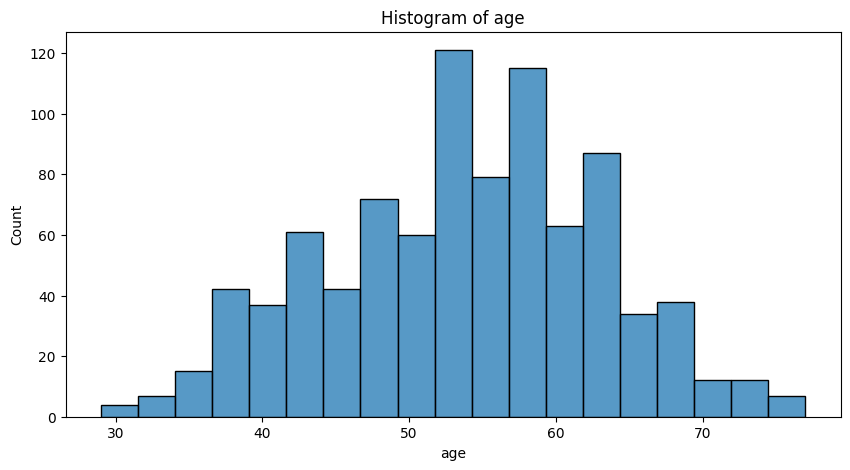

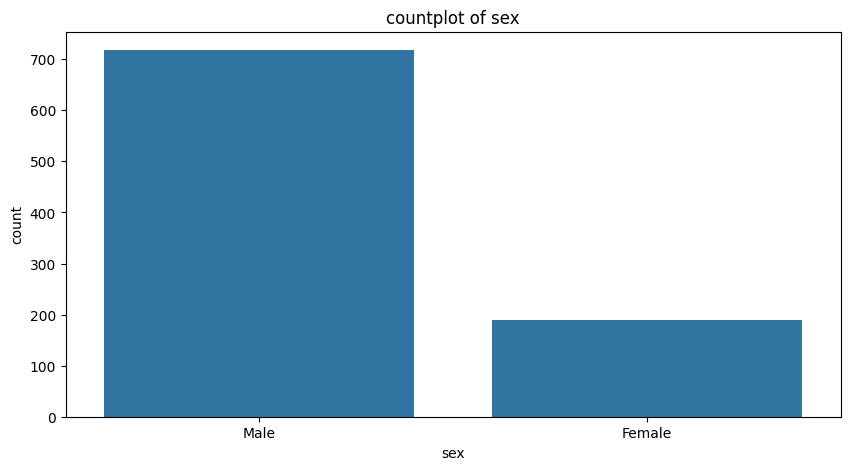

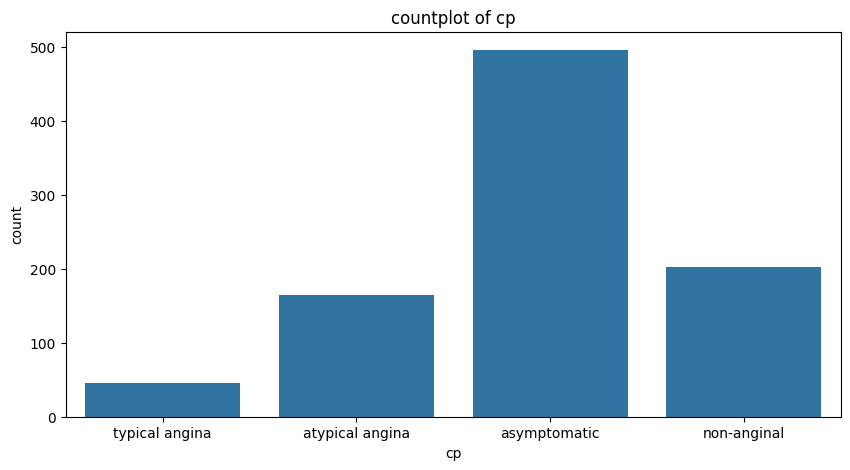

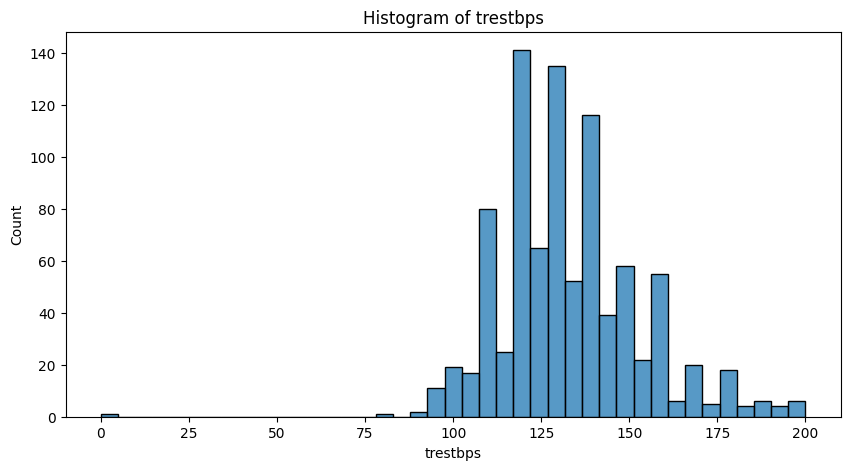

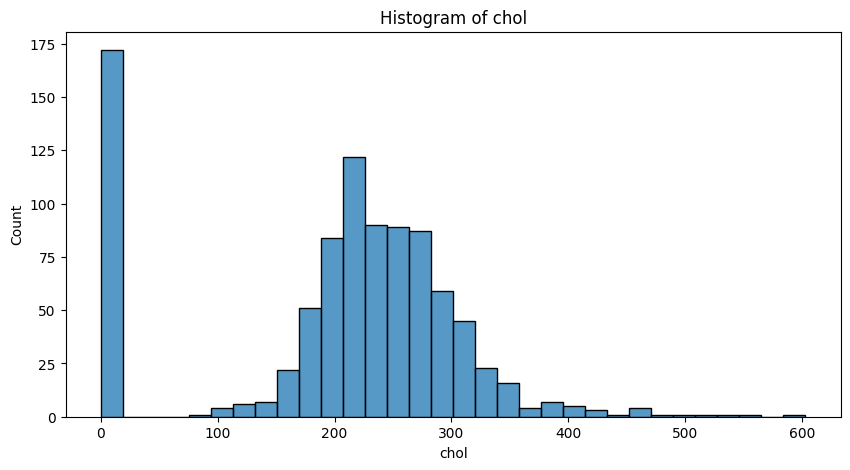

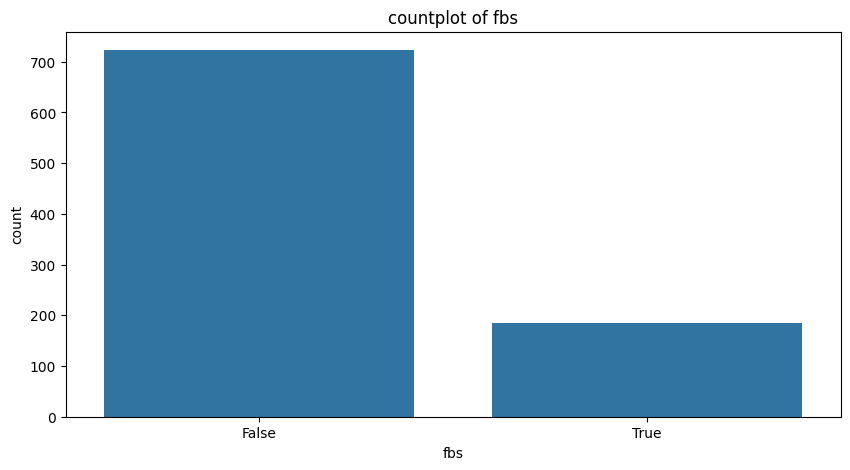

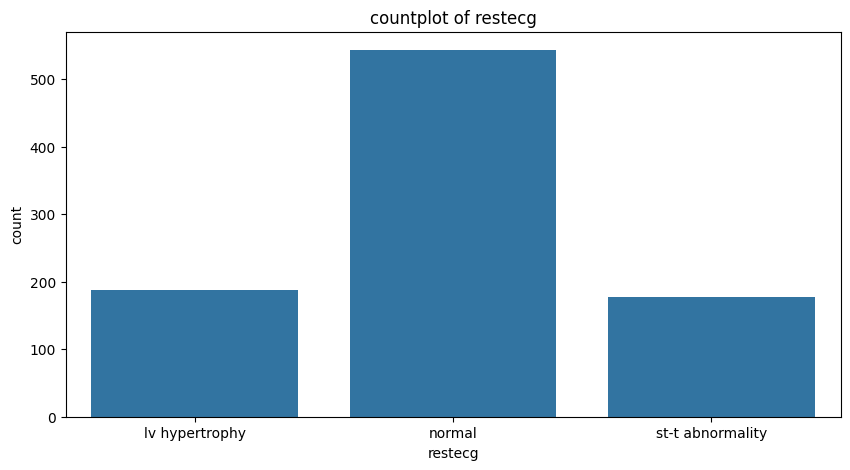

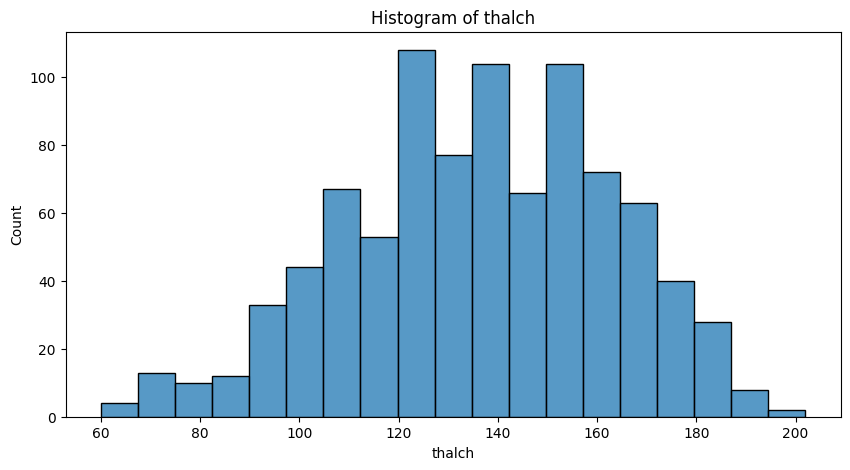

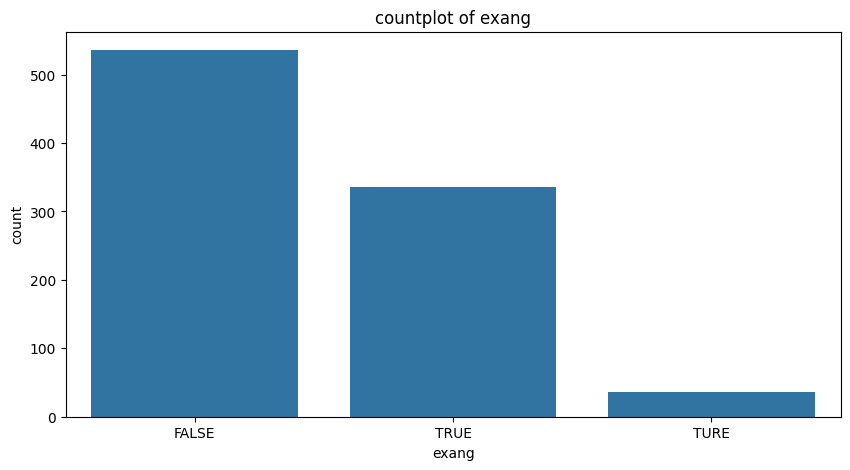

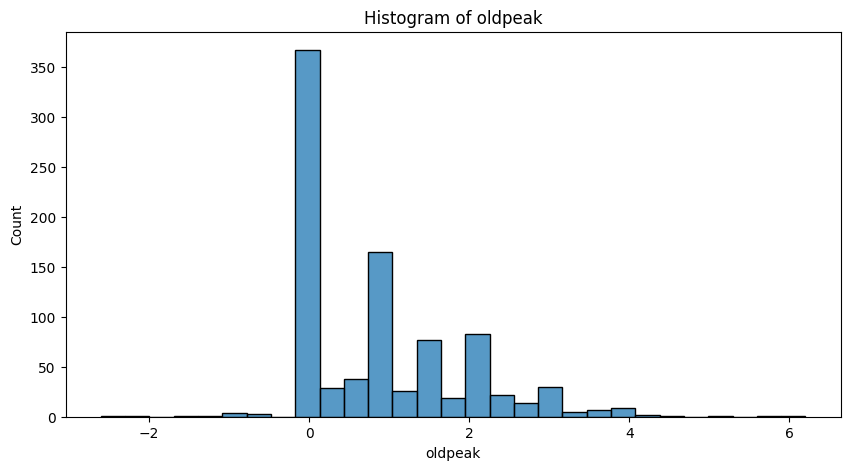

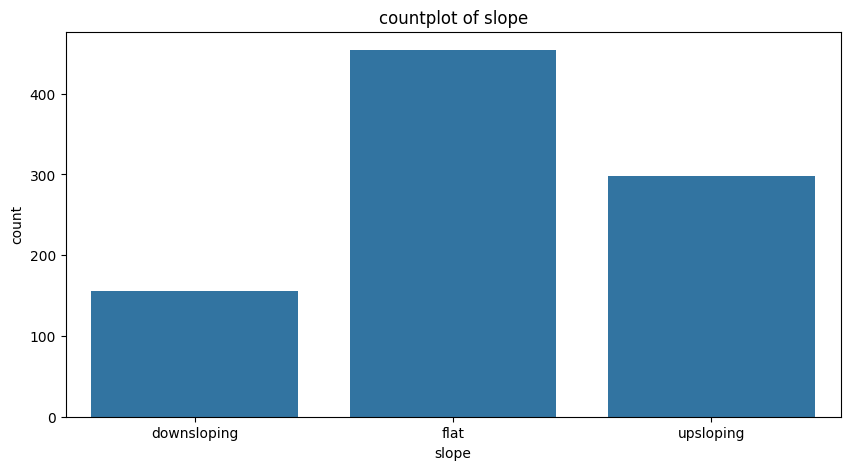

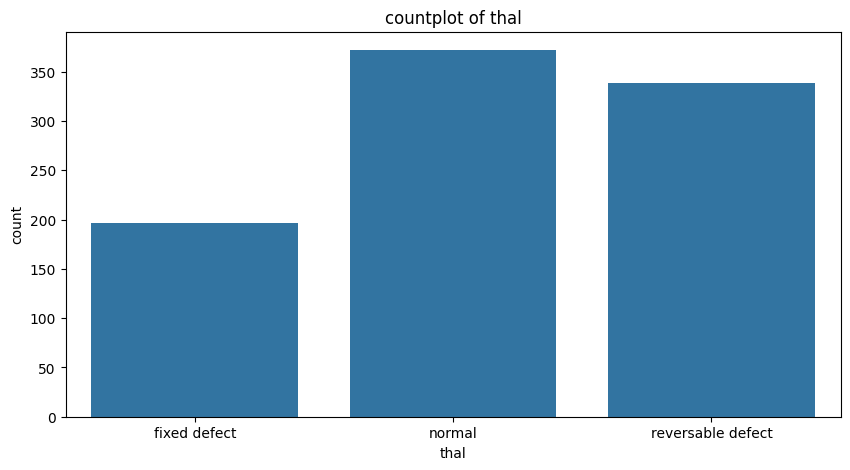

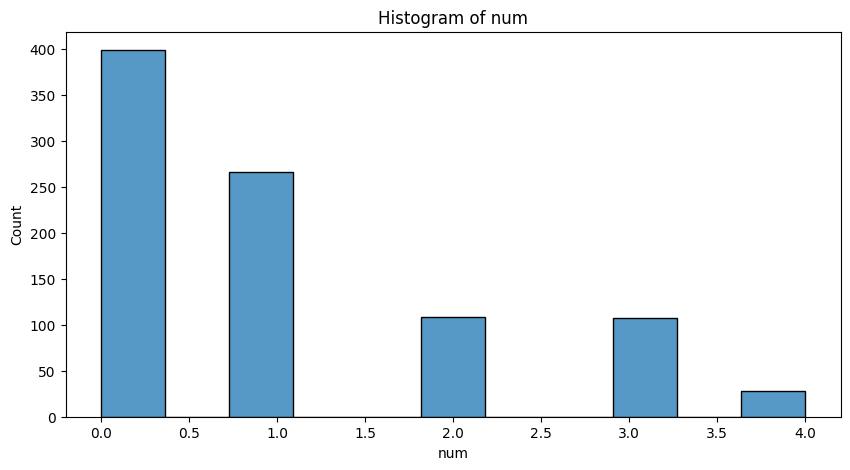

In [16]:
for col in data.columns:
  if data[col].dtype=='float64':
    fig=plt.figure(figsize=(10,5))
    sns.histplot(data[col])
    plt.title(f"Histogram of {col}")
    plt.show()
  else:
    fig=plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=col)
    plt.title(f"countplot of {col}")
    plt.show()

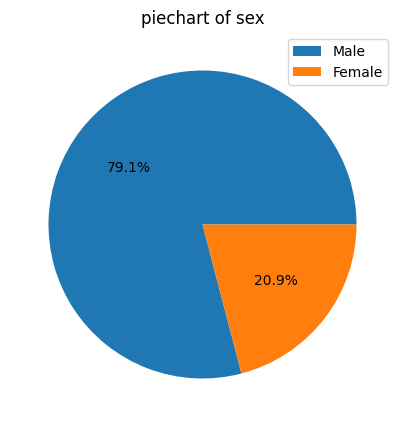

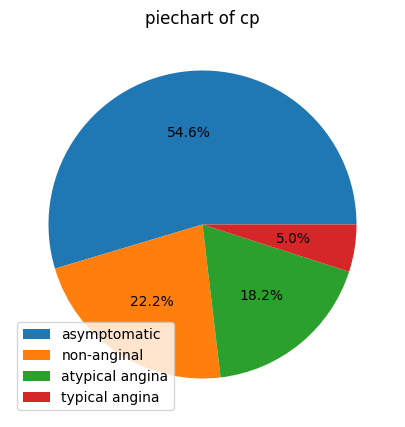

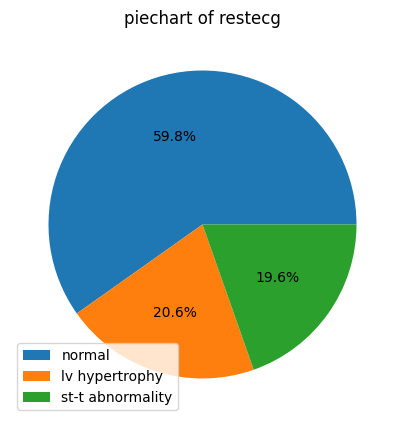

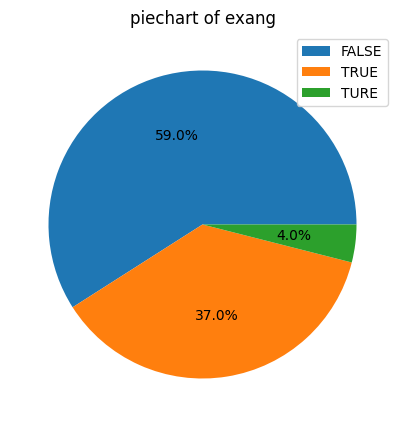

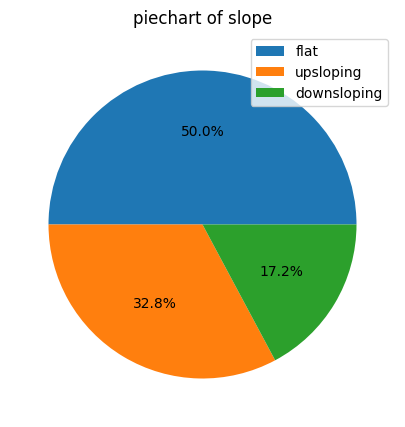

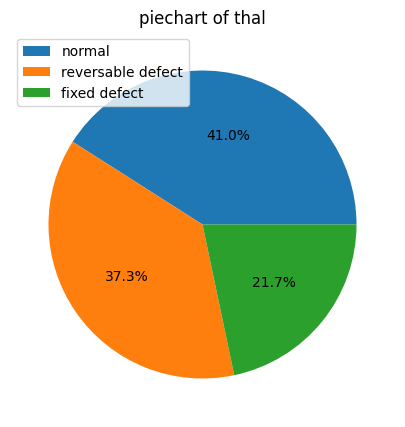

In [17]:
#for categorical columns plotting piechart
for col in data.columns:
  if data[col].dtype=='object':
    fig=plt.figure(figsize=(10,5))
    plt.pie(data[col].value_counts(), autopct='%1.1f%%')
    plt.title(f"piechart of {col}")
    plt.legend(data[col].value_counts().index)
    plt.show()

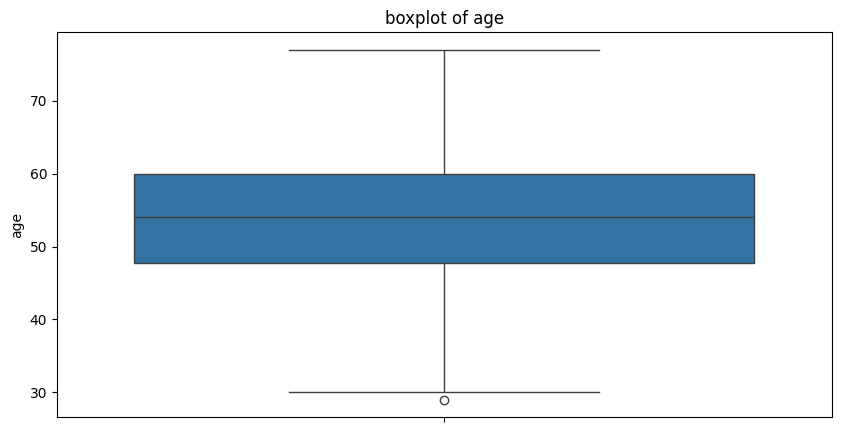

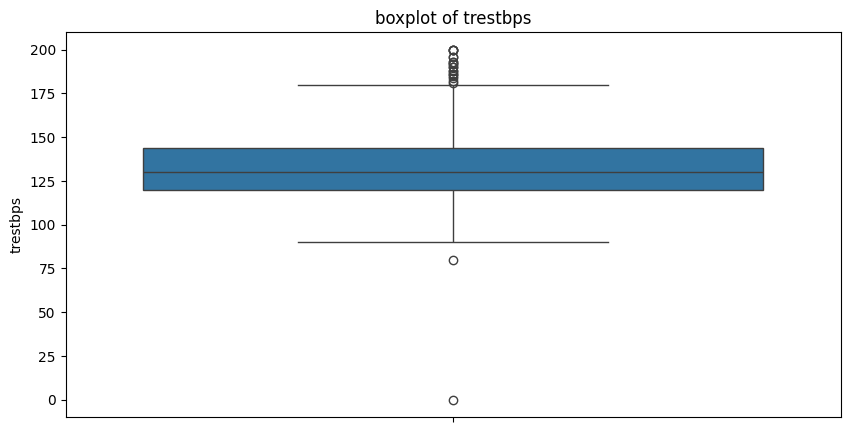

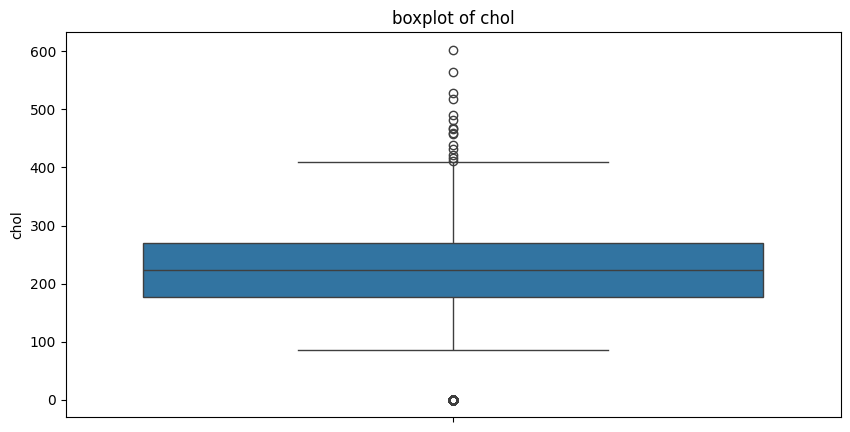

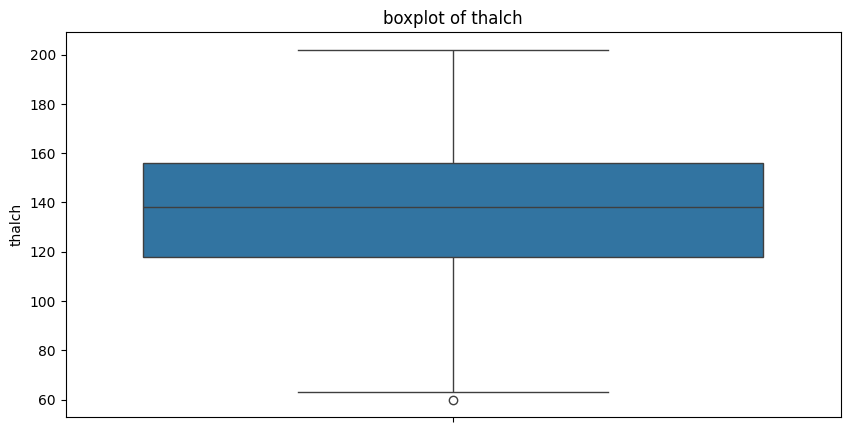

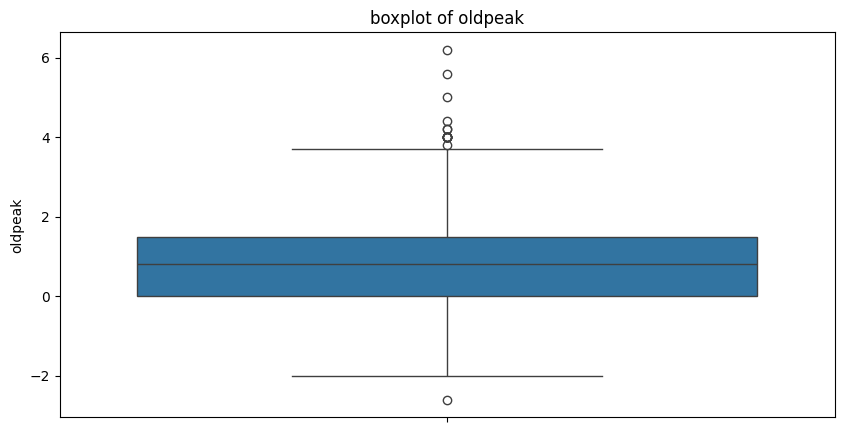

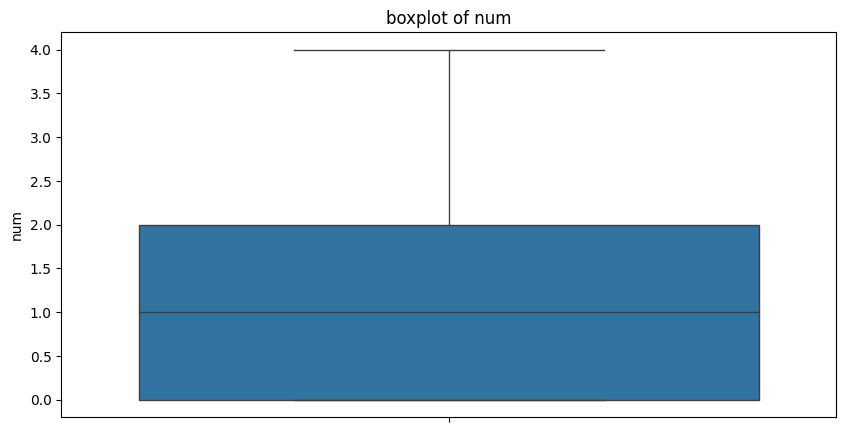

In [18]:
#box plot
for col in data.columns:
  if data[col].dtype=='float64':
    fig=plt.figure(figsize=(10,5))
    sns.boxplot(data[col])
    plt.title(f"boxplot of {col}")
    plt.show()

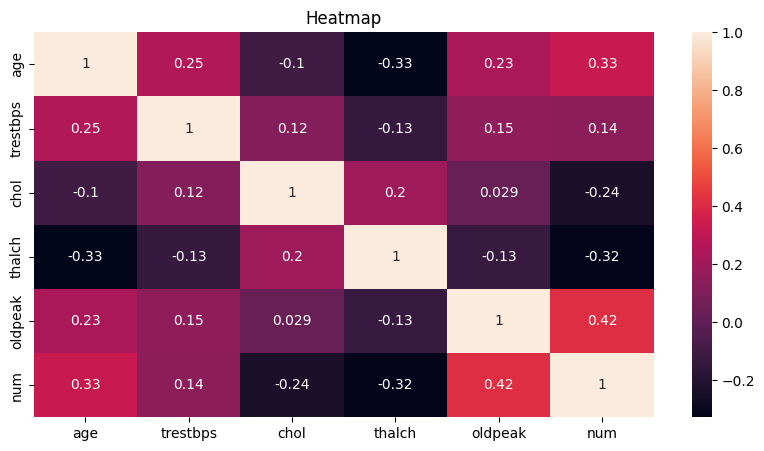

In [19]:
#heatmap
fig=plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True)
plt.title("Heatmap")
plt.show()

3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [20]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.000000,Male,typical angina,145.000000,233.00000,True,lv hypertrophy,150.000000,FALSE,2.300000,downsloping,fixed defect,0.000000
1,41.000000,Male,atypical angina,135.000000,203.00000,False,normal,132.000000,FALSE,0.000000,flat,fixed defect,0.000000
2,57.000000,Male,asymptomatic,140.000000,192.00000,False,normal,148.000000,FALSE,0.400000,flat,fixed defect,0.000000
3,52.000000,Male,typical angina,118.000000,186.00000,False,lv hypertrophy,190.000000,FALSE,0.000000,flat,fixed defect,0.000000
4,57.000000,Male,asymptomatic,110.000000,201.00000,False,normal,126.000000,TRUE,1.500000,flat,fixed defect,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,62.000000,Male,asymptomatic,166.000000,170.00000,False,st-t abnormality,120.000000,TRUE,3.000000,flat,normal,4.000000
905,56.000000,Male,non-anginal,170.000000,0.00000,False,lv hypertrophy,123.000000,TRUE,2.500000,downsloping,normal,4.000000
906,56.000000,Male,non-anginal,144.000000,208.00000,True,st-t abnormality,105.000000,TURE,0.892308,downsloping,normal,4.000000
907,57.000000,Male,asymptomatic,142.000000,277.00000,True,st-t abnormality,182.000000,FALSE,0.892308,flat,normal,4.000000


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=le.fit_transform(data[col])
data['fbs']=data['fbs'].astype(int)

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.000000,1,3,145.000000,233.00000,1,0,150.000000,0,2.300000,0,0,0.000000
1,41.000000,1,1,135.000000,203.00000,0,1,132.000000,0,0.000000,1,0,0.000000
2,57.000000,1,0,140.000000,192.00000,0,1,148.000000,0,0.400000,1,0,0.000000
3,52.000000,1,3,118.000000,186.00000,0,0,190.000000,0,0.000000,1,0,0.000000
4,57.000000,1,0,110.000000,201.00000,0,1,126.000000,1,1.500000,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,62.000000,1,0,166.000000,170.00000,0,2,120.000000,1,3.000000,1,1,4.000000
905,56.000000,1,2,170.000000,0.00000,0,0,123.000000,1,2.500000,0,1,4.000000
906,56.000000,1,2,144.000000,208.00000,1,2,105.000000,2,0.892308,0,1,4.000000
907,57.000000,1,0,142.000000,277.00000,1,2,182.000000,0,0.892308,1,1,4.000000


In [23]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()




In [24]:
num_col=data.columns.drop('num')

In [25]:
num_col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [26]:
for i in num_col:
  data[i]=sc.fit_transform(data[[i]])


In [27]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006651,0.514416,2.323823,0.568497,2.814729e-01,1.976894,-1.561793,0.523574,-0.786105,1.334521,-1.676906,-1.537278,0.000000
1,-1.397216,0.514416,0.234683,0.077891,1.369870e-02,-0.505844,0.015635,-0.148481,-0.786105,-0.845926,-0.226782,-1.537278,0.000000
2,0.351051,0.514416,-0.809887,0.323194,-8.448517e-02,-0.505844,0.015635,0.448901,-0.786105,-0.466718,-0.226782,-1.537278,0.000000
3,-0.195283,0.514416,2.323823,-0.756139,-1.380400e-01,-0.505844,-1.561793,2.017029,-0.786105,-0.845926,-0.226782,-1.537278,0.000000
4,0.351051,0.514416,-0.809887,-1.148624,-4.152911e-03,-0.505844,0.015635,-0.372499,0.963364,0.576105,-0.226782,-1.537278,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.897384,0.514416,-0.809887,1.598770,-2.808529e-01,-0.505844,1.593063,-0.596518,0.963364,1.998136,-0.226782,-0.207898,4.000000
905,0.241784,0.514416,1.279253,1.795013,-1.798240e+00,-0.505844,-1.561793,-0.484508,0.963364,1.524125,-1.676906,-0.207898,4.000000
906,0.241784,0.514416,1.279253,0.519437,5.832773e-02,1.976894,1.593063,-1.156563,2.712834,0.000000,-1.676906,-0.207898,4.000000
907,0.351051,0.514416,-0.809887,0.421316,6.742084e-01,1.976894,1.593063,1.718338,-0.786105,0.000000,-0.226782,-0.207898,4.000000


In [28]:
X=data.drop('num',axis=1)

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006651,0.514416,2.323823,0.568497,2.814729e-01,1.976894,-1.561793,0.523574,-0.786105,1.334521,-1.676906,-1.537278
1,-1.397216,0.514416,0.234683,0.077891,1.369870e-02,-0.505844,0.015635,-0.148481,-0.786105,-0.845926,-0.226782,-1.537278
2,0.351051,0.514416,-0.809887,0.323194,-8.448517e-02,-0.505844,0.015635,0.448901,-0.786105,-0.466718,-0.226782,-1.537278
3,-0.195283,0.514416,2.323823,-0.756139,-1.380400e-01,-0.505844,-1.561793,2.017029,-0.786105,-0.845926,-0.226782,-1.537278
4,0.351051,0.514416,-0.809887,-1.148624,-4.152911e-03,-0.505844,0.015635,-0.372499,0.963364,0.576105,-0.226782,-1.537278
...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.897384,0.514416,-0.809887,1.598770,-2.808529e-01,-0.505844,1.593063,-0.596518,0.963364,1.998136,-0.226782,-0.207898
905,0.241784,0.514416,1.279253,1.795013,-1.798240e+00,-0.505844,-1.561793,-0.484508,0.963364,1.524125,-1.676906,-0.207898
906,0.241784,0.514416,1.279253,0.519437,5.832773e-02,1.976894,1.593063,-1.156563,2.712834,0.000000,-1.676906,-0.207898
907,0.351051,0.514416,-0.809887,0.421316,6.742084e-01,1.976894,1.593063,1.718338,-0.786105,0.000000,-0.226782,-0.207898


In [30]:
y=(data['num']>0).astype(int)

In [31]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
904,1
905,1
906,1
907,1


4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,classification_report,confusion_matrix


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
X_train.shape

(726, 12)

In [45]:
X_test.shape

(182, 12)

In [51]:
model=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [52]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
y_pred=model.predict(X_test)

In [54]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1])

In [62]:
#modelscores using different metrices
print("Acuuracy Score :",accuracy_score(y_test,y_pred))
print('precision Score :',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print("f1_score :",f1_score(y_test,y_pred))
print("roc_auc_score :",roc_auc_score(y_test,y_pred))

#classification report
print("Classification report ",classification_report(y_test,y_pred))


#visualization of classification report
fig=plt.figure(figsize=(10,5))
sns.heatmap(classification_report(y_test,y_pred),annot=True)
plt.title("Classification Report of Decision Tree")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Acuuracy Score : 0.7252747252747253
precision Score : 0.7745098039215687
recall_score: 0.7452830188679245
f1_score : 0.7596153846153846
roc_auc_score : 0.7213257199602781
Classification report                precision    recall  f1-score   support

           0       0.66      0.70      0.68        76
           1       0.77      0.75      0.76       106

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.73      0.73       182



ValueError: Must pass 2-d input. shape=()

<Figure size 1000x500 with 0 Axes>

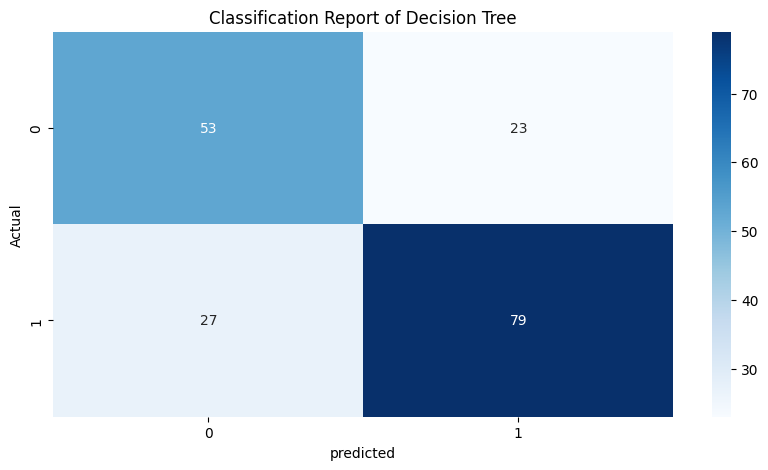

In [71]:
#visualization of classification report
fig=plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Classification Report of Decision Tree")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

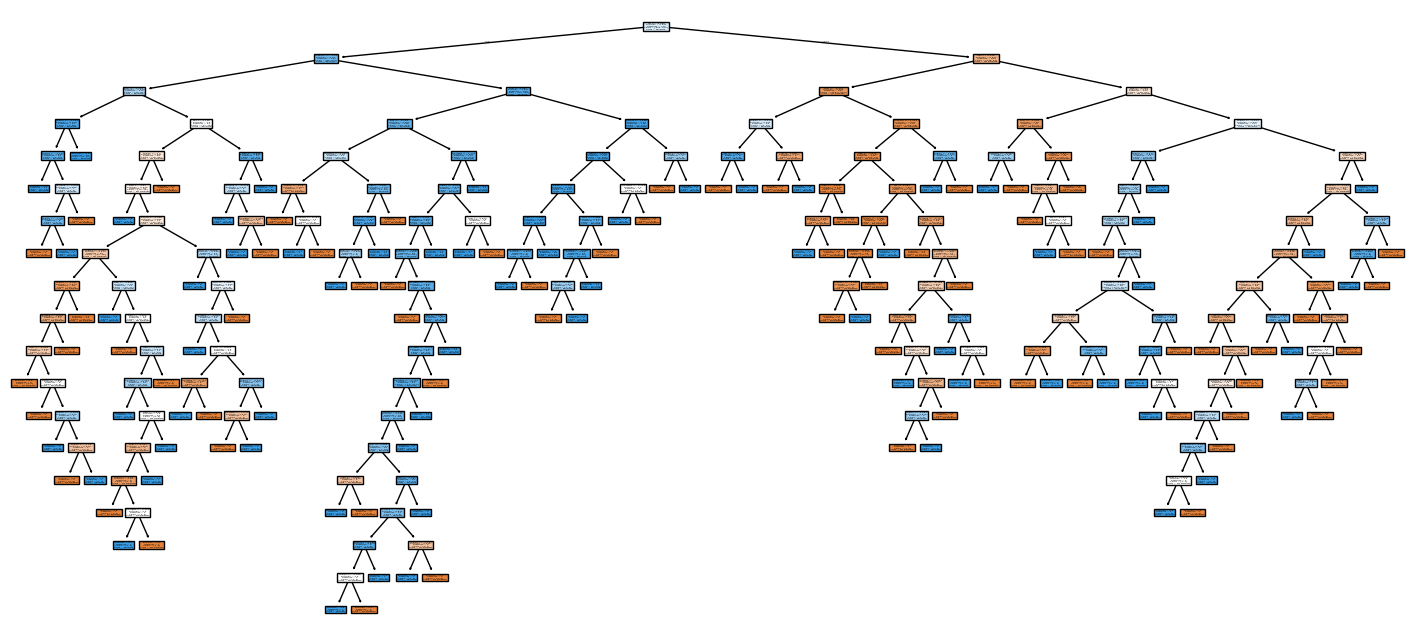

In [72]:
from sklearn import tree

plt.figure(figsize=(18,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()


5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "max_features":[None,"log2","sqrt"]
}

In [80]:
#gridsearchcv
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,              #5 folds crossvalidation
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=2)

In [81]:
print("best paramanters ",grid_search.best_params_)
print("best score ",grid_search.best_score_)

best paramanters  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
best score  0.775484175720359


In [82]:
best_model=grid_search.best_estimator_

In [84]:
best_ypred=best_model.predict(X_test)
best_proba=best_model.predict_proba(X_test)

In [89]:
print("Accuracy score :",accuracy_score(y_test,best_ypred))
print("Roc-aur score :",roc_auc_score(y_test,best_proba[:,1]))
print("classification report :",classification_report(y_test,best_ypred))

Accuracy score : 0.8131868131868132
Roc-aur score : 0.8634558093346574
classification report :               precision    recall  f1-score   support

           0       0.76      0.80      0.78        76
           1       0.85      0.82      0.84       106

    accuracy                           0.81       182
   macro avg       0.81      0.81      0.81       182
weighted avg       0.82      0.81      0.81       182



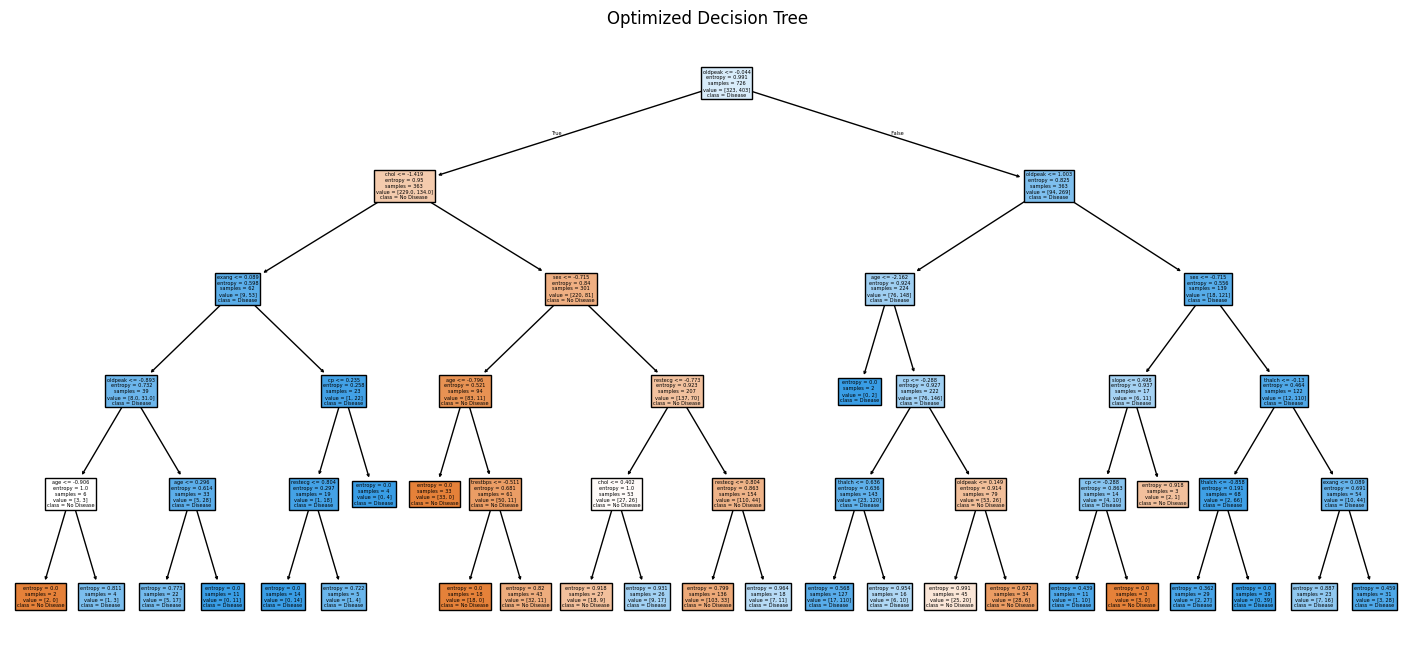

In [90]:
from sklearn import tree
plt.figure(figsize=(18,8))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Optimized Decision Tree")
plt.show()


6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [101]:
#lets see the model evaluation and lets analyse the performance
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix

y_pred = best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)[:,1]

print("accuracy score :",accuracy_score(y_test,y_pred))
print("precision score :",precision_score(y_test,y_pred))
print("recall_score :",recall_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_proba))
print("classification report :",classification_report(y_test,y_pred))

accuracy score : 0.8131868131868132
precision score : 0.8529411764705882
recall_score : 0.8207547169811321
f1 score : 0.8365384615384616
roc_auc_score : 0.8634558093346574
classification report :               precision    recall  f1-score   support

           0       0.76      0.80      0.78        76
           1       0.85      0.82      0.84       106

    accuracy                           0.81       182
   macro avg       0.81      0.81      0.81       182
weighted avg       0.82      0.81      0.81       182



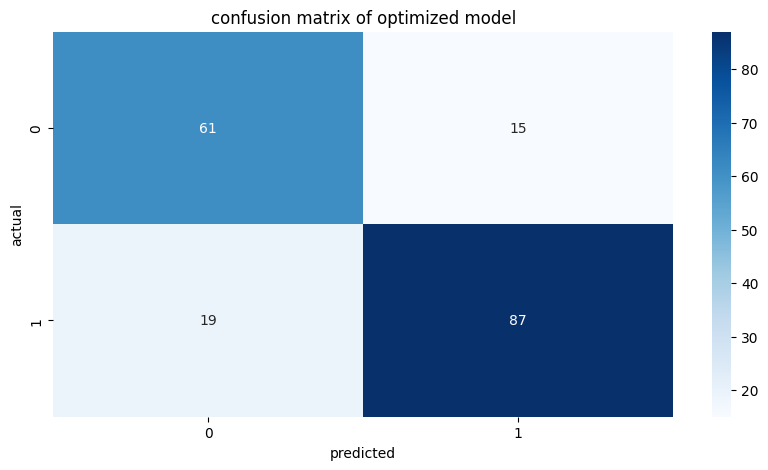

In [103]:
#visualization of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix of optimized model")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

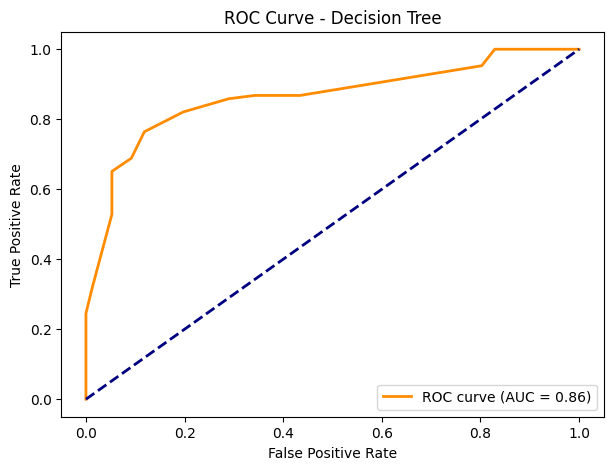

In [104]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


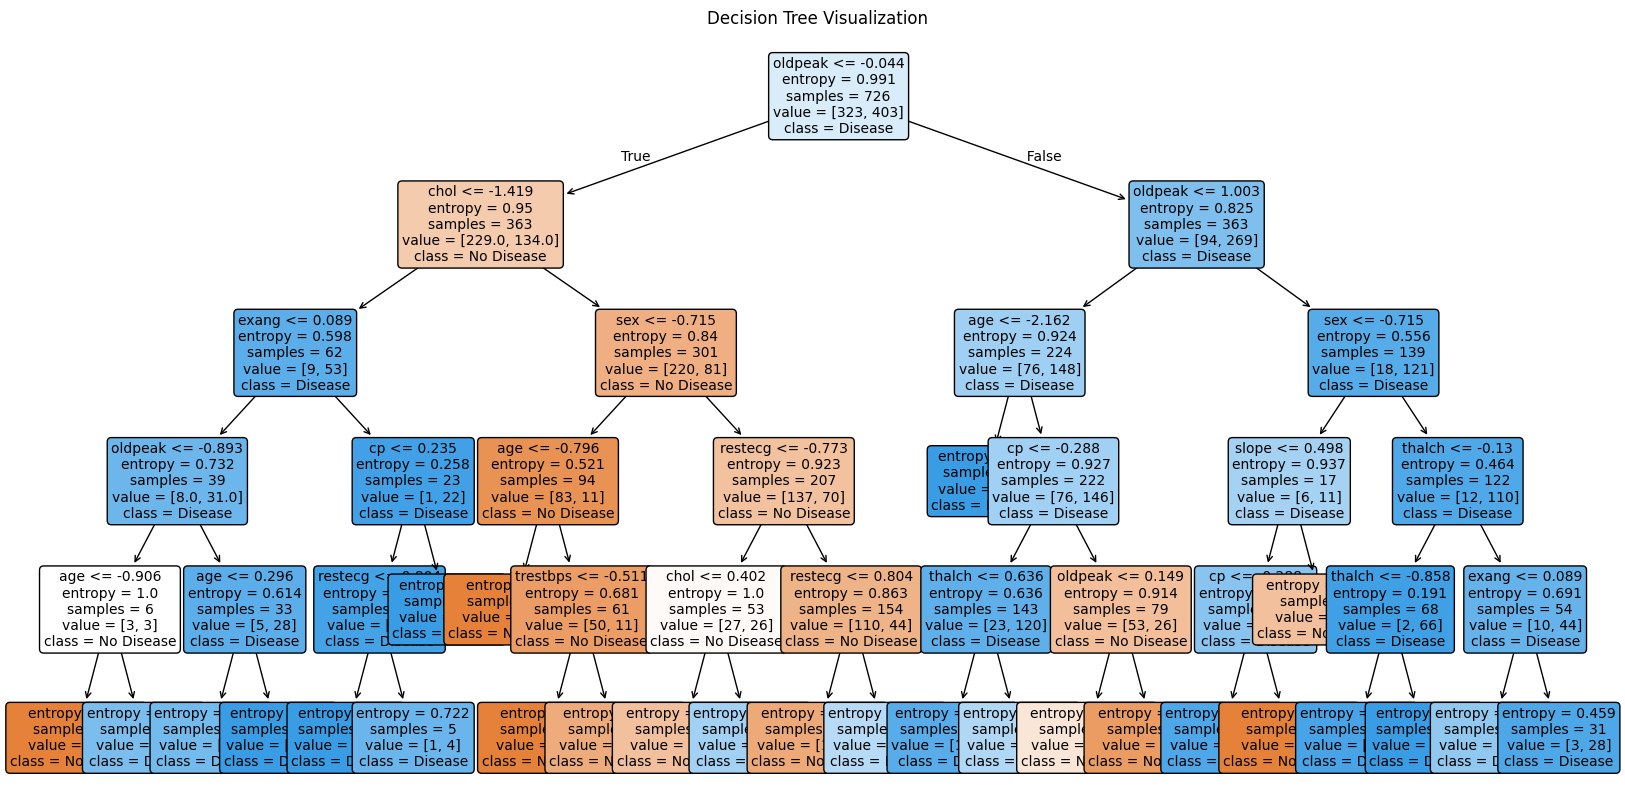

In [105]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_model,
    filled=True,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


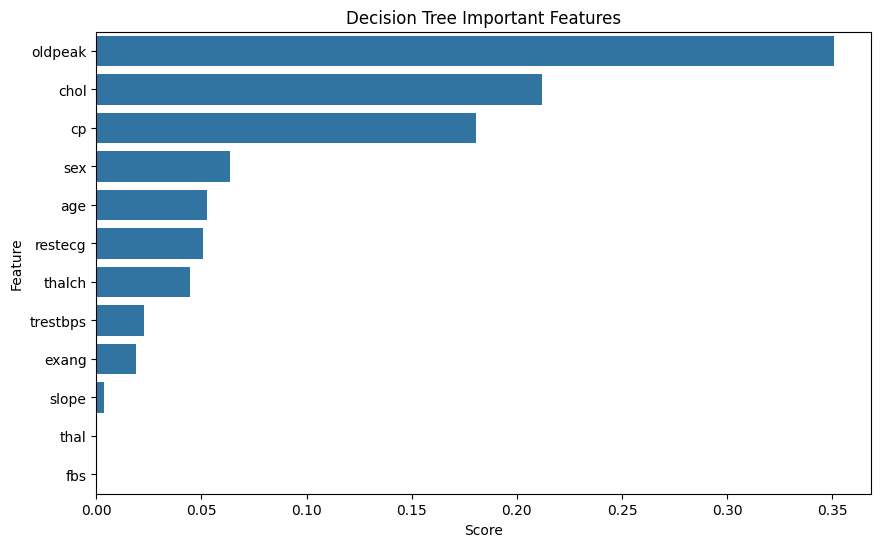

In [116]:
#feature importances graph



import numpy as np

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Decision Tree Important Features")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()



Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


The common hyperparameters of decision tree models are :
 1.max_depth :

It tells the depth of the tree how much we can grow the tree.

smaller depth means it avoids overfitting but may causes underfitting,

larger depth means it is a complex model and it may causes overfitting

2.min_samples_split

It requires us to split an internal node

higher values means tree becomes simpler and less overfitting

lower values means tree becomes more complex


3.criterion

it is used to measure the quality of a split.there are two types in this
gini index and entropy.both performs similarly but entropy is much computationally expensive

4.max_features

number of features used to get a best split

lower values : reduce varinace and less overfitting

higher values : more accurate but overfitting

5.min_samples_leaf

it gives the minimum samples required in a leaf node

higher value : larger leaf nodes, and smoother model

useful for imbalanced datasets



2. Encoding Techniques these are used to convert the categorical data into numerical data.there are two types of encoding techniques they are labelEncoder and One Hot Encoder

1. Label Encoder : it is used to convert the categorical values into numerical values. for example In a give column there are 6 classes in it. by using label encoding it gives the labeling of numerical values like 0,1,2,3,4,5.

And it is used for ordinal data and tree based models like DecisionTree,Random Forest,XG boost

2. One Hot encoding : it is another type of encoding technique to convert the categorical columns into binary columns
for example : in a given dataset we have a gender column in it (male,female)
it encodes the male as 0 and female as 1. in this way it is used

it is used for nominal data, and linear models(logistic regression ,svm)